In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras.backend as K
import tensorflow as tf
import os

In [ ]:

"""y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
#y = np.array(y)
print(y)
y = np.array(y)
"""

'y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Cropped_Labelled_Images')
files = os.listdir()
print(files)
print(len(files))

['G_1.jpg', 'G_2.jpg', 'G_3.jpg', 'G_4.jpg', 'G_5.jpg', 'G_7.jpg', 'G_6.jpg', 'G_8.jpg', 'G_9.jpg', 'G_10.jpg', 'G_11.jpg', 'G_12.jpg', 'G_13.jpg', 'G_14.jpg', 'G_15.jpg', 'G_16.jpg', 'G_17.jpg', 'G_18.jpg', 'G_19.jpg', 'G_20.jpg', 'G_21.jpg', 'G_22.jpg', 'G_23.jpg', 'G_24.jpg', 'G_25.jpg', 'G_26.jpg', 'G_27.jpg', 'G_28.jpg', 'G_29.jpg', 'G_30.jpg', 'G_31.jpg', 'G_32.jpg', 'G_33.jpg', 'G_34.jpg', 'G_35.jpg', 'G_36.jpg', 'G_37.jpg', 'G_38.jpg', 'G_39.jpg', 'G_40.jpg', 'G_41.jpg', 'G_42.jpg', 'G_44.jpg', 'G_43.jpg', 'G_45.jpg', 'G_46.jpg', 'G_47.jpg', 'G_49.jpg', 'G_48.jpg', 'G_50.jpg', 'H_1.jpg', 'H_2.jpg', 'H_3.jpg', 'H_5.jpg', 'H_4.jpg', 'H_6.jpg', 'H_7.jpg', 'H_8.jpg', 'H_9.jpg', 'H_10.jpg', 'H_11.jpg', 'H_12.jpg', 'H_13.jpg', 'H_14.jpg', 'H_16.jpg', 'H_15.jpg', 'H_17.jpg', 'H_18.jpg', 'H_19.jpg', 'H_20.jpg', 'H_21.jpg', 'H_22.jpg', 'H_23.jpg', 'H_24.jpg', 'H_25.jpg', 'H_27.jpg', 'H_26.jpg', 'H_28.jpg', 'H_29.jpg', 'H_30.jpg', 'H_31.jpg', 'H_32.jpg', 'H_33.jpg', 'H_34.jpg', 'H_35.jpg

In [ ]:
from PIL import Image
from skimage import io
import cv2 as cv
from google.colab.patches import cv2_imshow
images = []
y = []
#images = np.array(images)
h = 0
cnt = 0
for i in files:
    if cnt > 1000:
        break
    h+=1
    print(i)
    if ord(i[0]) >= 65:
        print(ord(i[0])-55)
        y.append(ord(i[0])-55)
    else:
        y.append(i[0])
    #print(y)
    pic = cv.imread(i)
    #pic = cv.cvtColor(pic, cv.COLOR_BGR2GRAY)
    print(pic.shape)
    pic = cv.resize(pic, (512, 512))
    images.append(pic)

    


Streaming output truncated to the last 5000 lines.
24
(2448, 2448, 3)
O_13.jpg
24
(2448, 2448, 3)
O_14.jpg
24
(2448, 2448, 3)
O_15.jpg
24
(2448, 2448, 3)
O_16.jpg
24
(2448, 2448, 3)
O_18.jpg
24
(2448, 2448, 3)
O_17.jpg
24
(2448, 2448, 3)
O_21.jpg
24
(2448, 2448, 3)
O_20.jpg
24
(2448, 2448, 3)
O_19.jpg
24
(2448, 2448, 3)
O_23.jpg
24
(2448, 2448, 3)
O_22.jpg
24
(2448, 2448, 3)
O_24.jpg
24
(2448, 2448, 3)
O_25.jpg
24
(2448, 2448, 3)
O_26.jpg
24
(2448, 2448, 3)
O_29.jpg
24
(2448, 2448, 3)
O_27.jpg
24
(2448, 2448, 3)
O_28.jpg
24
(2448, 2448, 3)
O_30.jpg
24
(2448, 2448, 3)
O_31.jpg
24
(2448, 2448, 3)
O_33.jpg
24
(2448, 2448, 3)
O_34.jpg
24
(2448, 2448, 3)
O_32.jpg
24
(2448, 2448, 3)
O_36.jpg
24
(2448, 2448, 3)
O_35.jpg
24
(2448, 2448, 3)
O_37.jpg
24
(2448, 2448, 3)
O_39.jpg
24
(2448, 2448, 3)
O_38.jpg
24
(2448, 2448, 3)
O_40.jpg
24
(2448, 2448, 3)
O_41.jpg
24
(2448, 2448, 3)
O_42.jpg
24
(2448, 2448, 3)
O_43.jpg
24
(2448, 2448, 3)
O_44.jpg
24
(2448, 2448, 3)
O_46.jpg
24
(2448, 2448, 3)
O_45.j

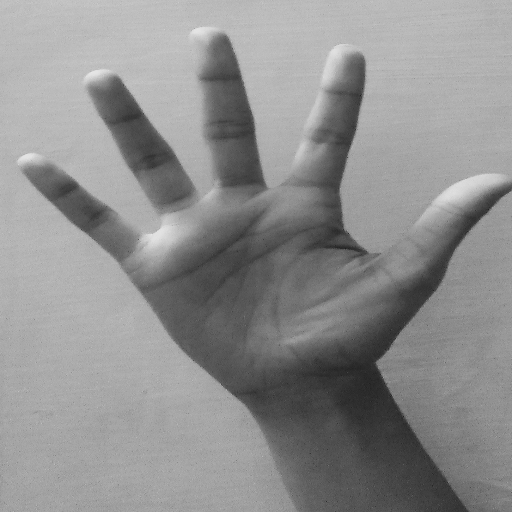

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(pic)

In [ ]:
x = np.array(images)
y = np.array(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
y = np.array(y)

In [ ]:
print(y)

['16' '16' '16' ... '5' '5' '5']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
enc = enc.fit(y_test)
y_train = enc.transform(y_train).toarray()
y_test = enc.transform(y_test).toarray()

In [ ]:
print(x_train[0].shape, y_test.shape, y_train.shape)

(512, 512, 3) (455, 35) (1818, 35)


In [ ]:
print(y_train[4])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
def identity_block(X, f, filters, stage, block):
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. We'll need this later to add back to the main path. 
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    
    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [ ]:
def ResNet50(input_shape = (512, 512, 3), classes = 35): 
  #change  
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    #X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    #X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    #X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL.
    X = AveragePooling2D((2, 2), name='avg_pool')(X)

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model = ResNet50(input_shape = (512, 512, 3), classes = 35)
#change
from keras.optimizers import Adam, SGD
model.summary()
opt = SGD(learning_rate = 0.000025)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data=(x_test, y_test))


Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 518, 518, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 256, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 256, 256, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

KeyboardInterrupt: ignored

In [ ]:
y_predict = np.round(model.predict(x_test))

In [ ]:
print(y_predict)

In [ ]:
print(y_predict.shape)

In [ ]:
incorrect = 0
for i in range(y_predict.shape[0]):
    if (y_predict[i]==y_test).all() == False:
        incorrect += 1
print(incorrect)

In [ ]:
print(y_predict[0], y_test[0])